# **Titanic Dataset**

Este é um conjunto de dados clássico usado em muitos tutoriais e demos de mineração de dados - perfeito para iniciar a análise exploratória e construir modelos de classificação binários para prever a sobrevivência.

Os dados abrangem apenas os passageiros, não a tripulação.

###As características dos dados são
* survived - Sobrevivente (0 = Não; 1 = Sim)
* pclass - Classe do passageiro 
* sex - Sexo
* age - Idade
* sibsp - Número de irmãos/cônjuges a bordo
* parch - Número de pais/filhos a bordo
* fare - Tarifa do passageiro
* embark_town - Porto de embarque 
* class - Classe do passageiro 
* who - informa se era homem, mulher ou criança
* alone - informa se o passageiro estava sozinho

In [3]:
import seaborn as sns
import pandas as pd

### **Crie um DataFrame utilizando o dataset importado e mostre as 5 primeiras linhas do DataFrame.**

In [25]:
original = sns.load_dataset('titanic')

In [26]:
original[0:5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### Resultado esperado
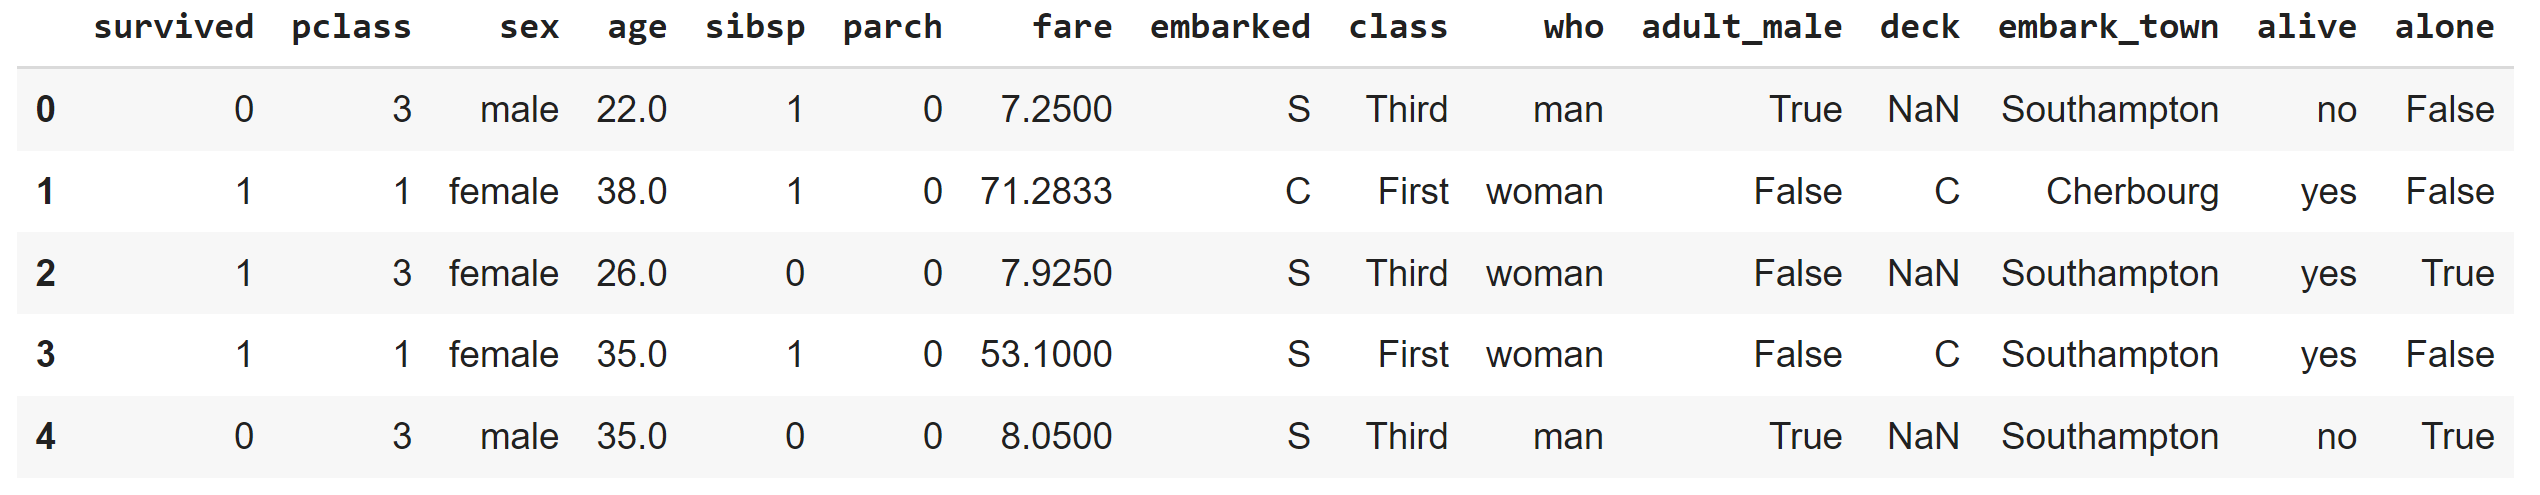

### **Verifique se há registros incompletos e caso encontre, faça a remoção desses registros**

In [27]:
dataset = original.dropna()

### **Verifique os tipos dos atributos e apresente a descrição dos atributos numéricos.**

In [30]:
dataset.select_dtypes(include='number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,182.0,0.675824,0.469357,0.00,0.0,1.0,1.00,1.0000
pclass,182.0,1.192308,0.516411,1.00,1.0,1.0,1.00,3.0000
age,182.0,35.623187,15.671615,0.92,24.0,36.0,47.75,80.0000
sibsp,182.0,0.467033,0.645007,0.00,0.0,0.0,1.00,3.0000
parch,182.0,0.478022,0.755869,0.00,0.0,0.0,1.00,4.0000
fare,182.0,78.919735,76.490774,0.00,29.7,57.0,90.00,512.3292


##### Resultado esperado
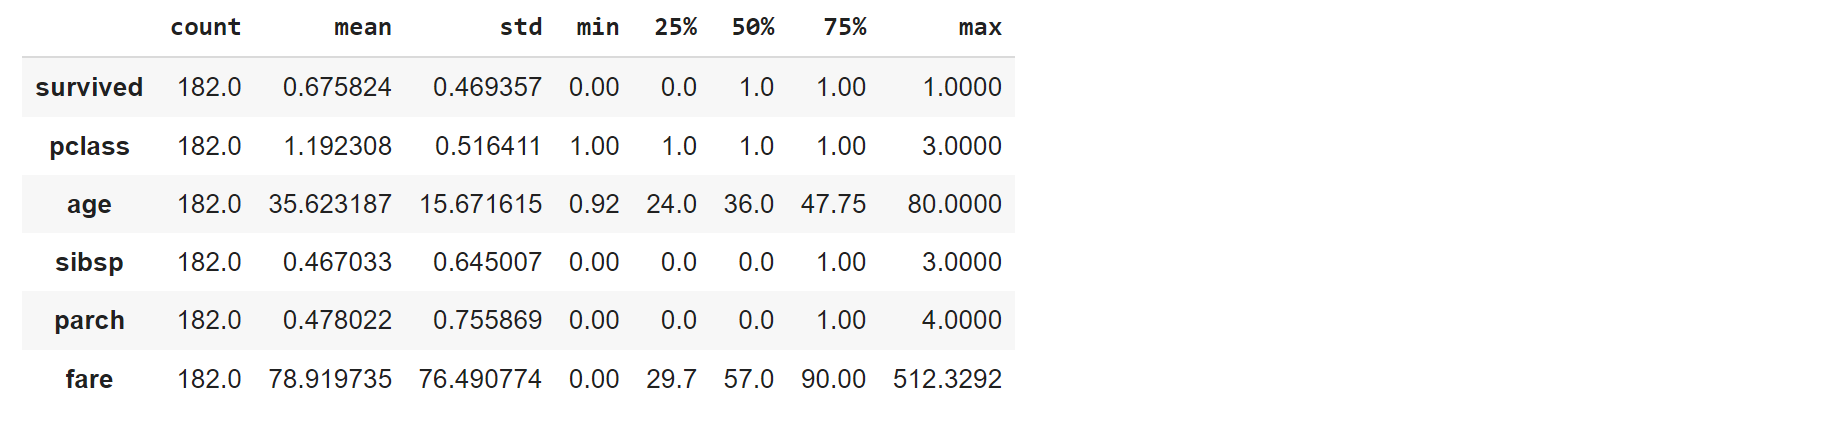

### **Calcule o total de sobreviventes, idade média dos passageiros, e o número de homens e mulheres a bordo**

In [58]:
print(f"Total sobreviventes: {dataset['survived'].sum()}")
print(f"Idade média dos passageiros: {dataset['age'].sum()/dataset['age'].size}")
print(f"Total de homens: {(dataset['sex'] == 'male').sum()}")
print(f"Total de mulheres: {(dataset['sex'] == 'female').sum()}")

Total sobreviventes: 123
Idade média dos passageiros: 35.62318681318681
Total de homens: 94
Total de mulheres: 88


##### Resultado esperado

<pre>
Total sobreviventes: 123
Idade média dos passageiros: 35.62318681318681
Total de homens: 94
Total de mulheres: 88
</pre>

### **Gere uma visualização para a quantidade de homens e mulheres a bordo**

<BarContainer object of 2 artists>

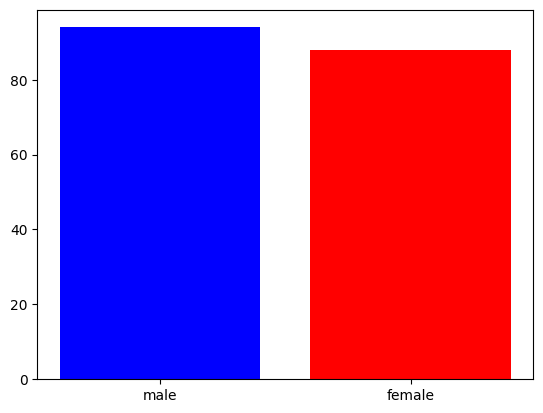

In [62]:
import matplotlib.pyplot as plt

plt.bar(['male', 'female'], [(dataset['sex'] == 'male').sum(), (dataset['sex'] == 'female').sum()], color=['blue', 'red'] )

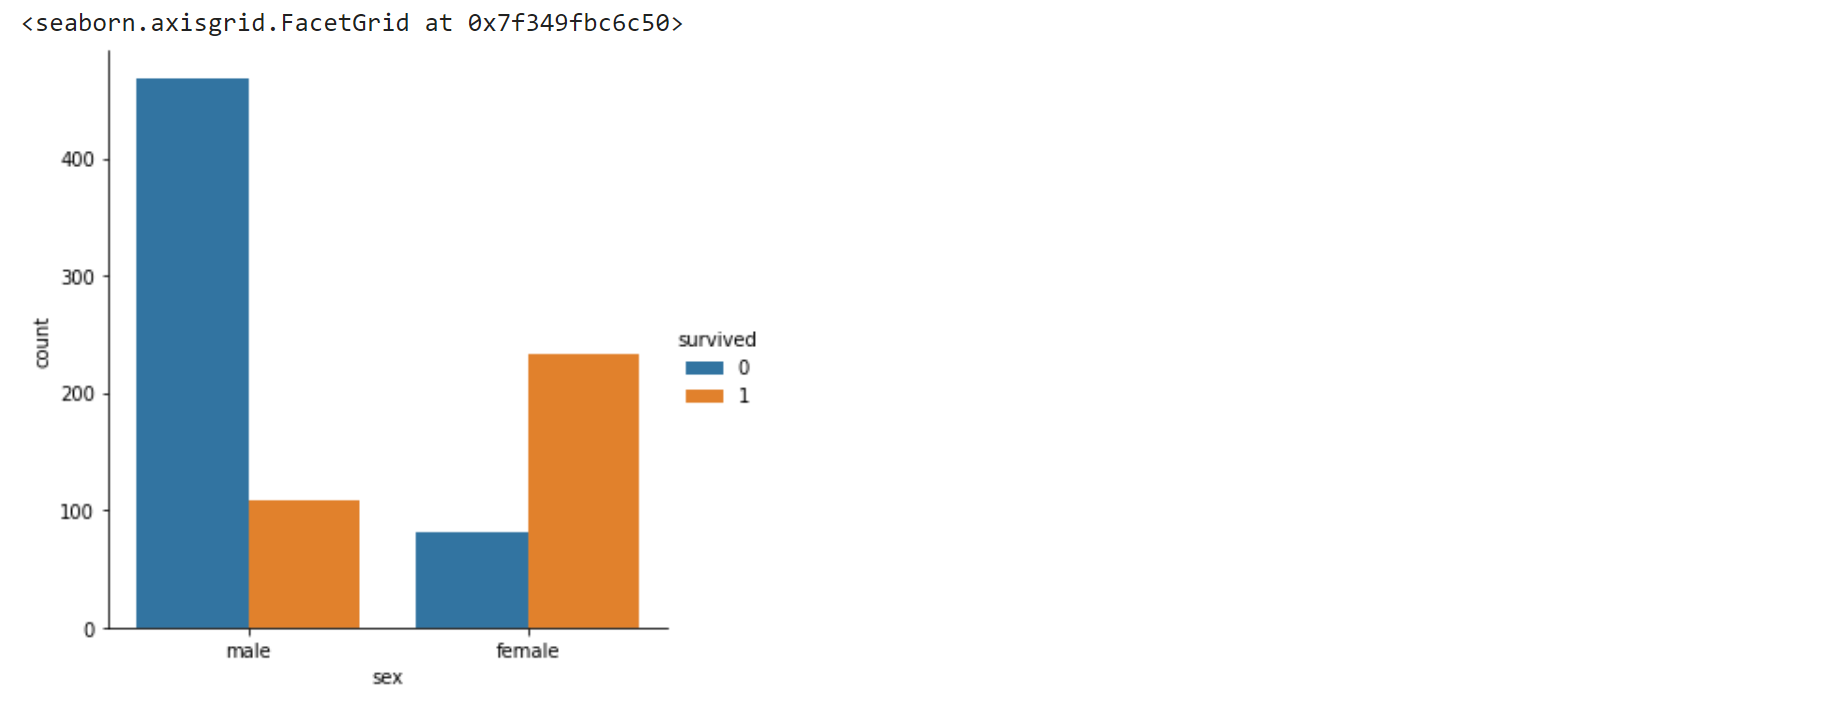

### **Gere uma visualização que resuma o intevalo das idades dos passageiros considerando seu sexo e se o passageiro sobreviveu.**

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

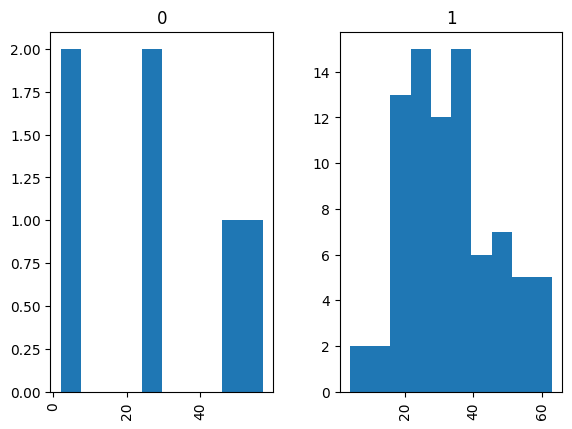

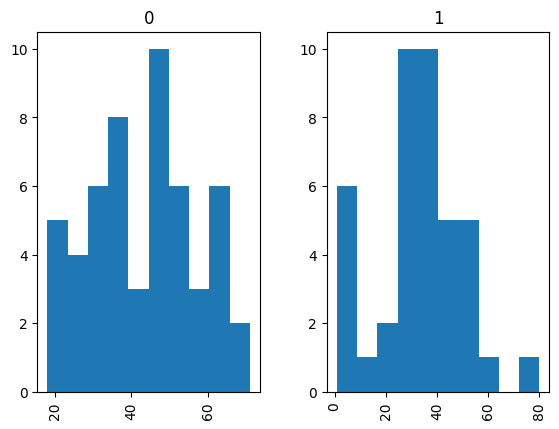

In [156]:
males = dataset[dataset.sex == 'male']
females = dataset[dataset.sex == 'female']
females[['age', 'survived']].hist(column=['age'], bins=10, by='survived')
males[['age', 'survived']].hist(column=['age'], bins=10, by='survived')

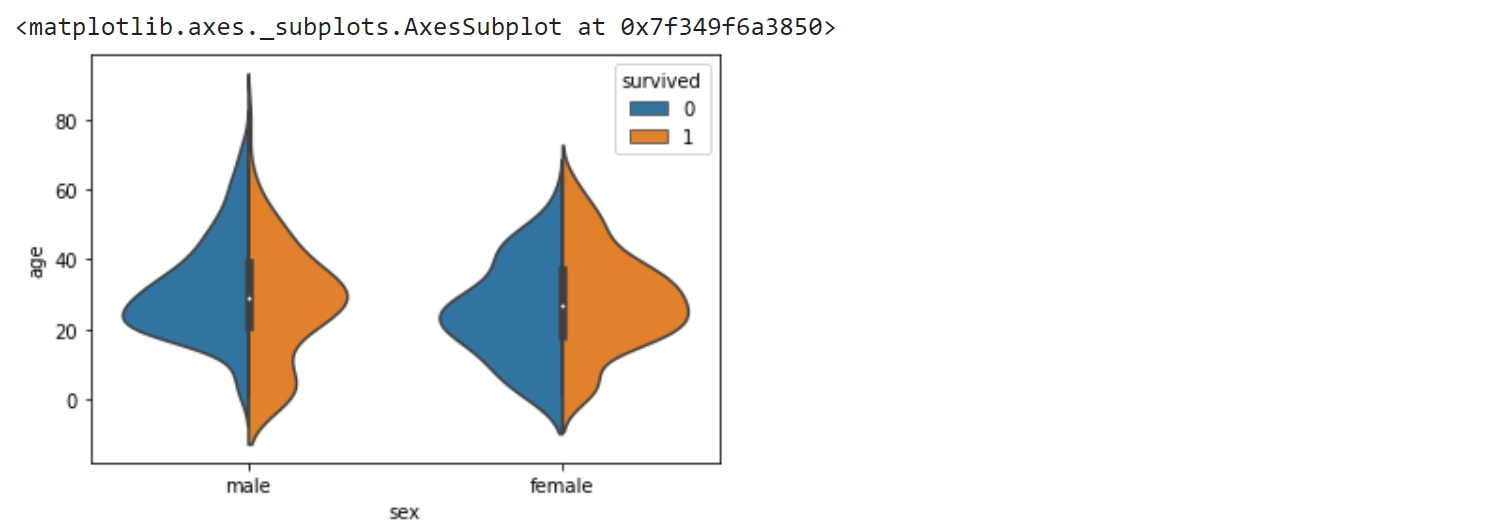

### **Gere uma visualização do tipo boxplot que mostre a tarifa de acordo com a classe dos passageiros**

<Axes: title={'center': 'fare'}, xlabel='[class]'>

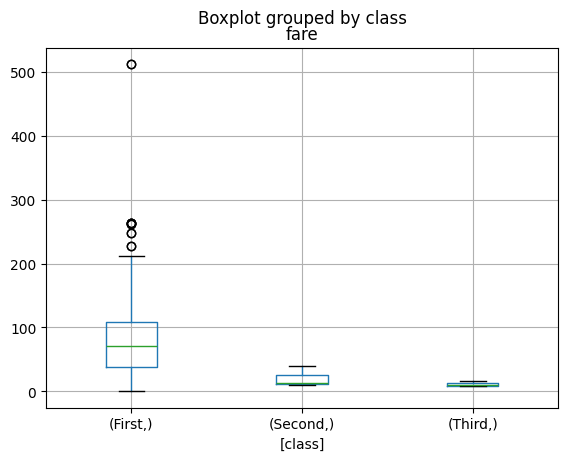

In [106]:
dataset.boxplot(column=['fare'], by=['class'])

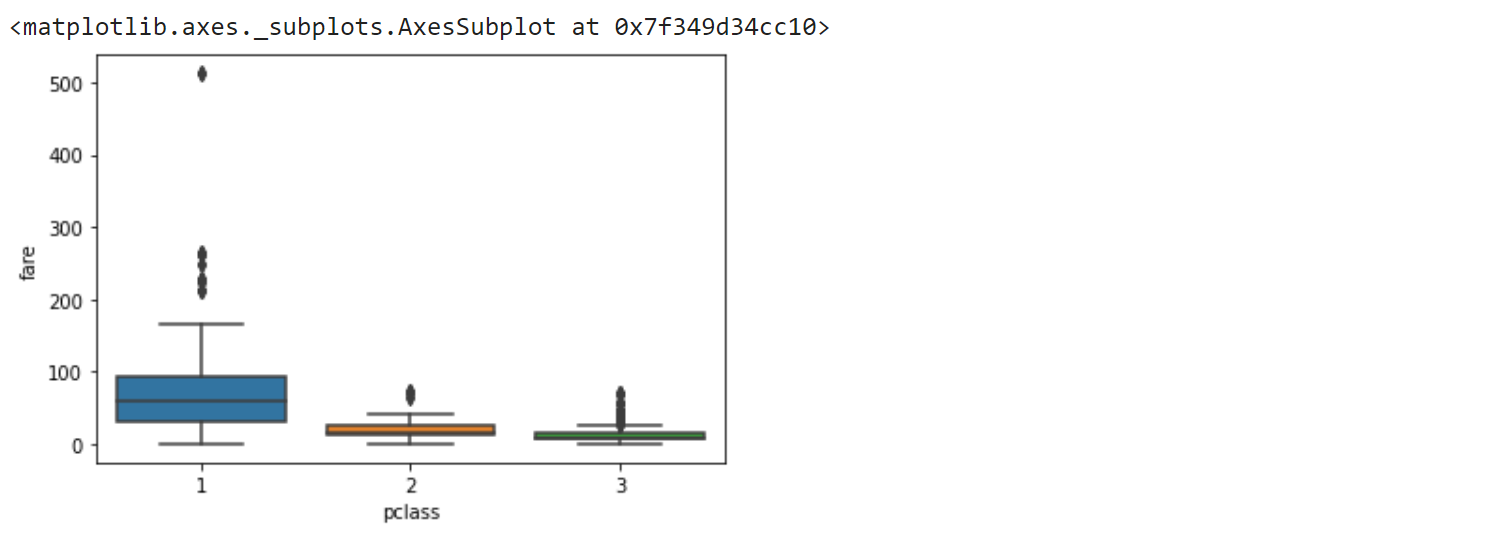

### **Gere uma visualização que mostre a correlação dos atributos no dataset**

In [131]:
corr = dataset.select_dtypes(exclude=['category', 'object']).corr()
corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.037698,-0.251045,0.101376,0.018739,0.130632,-0.582727,-0.111827
pclass,-0.037698,1.000000,-0.305708,-0.105262,0.046273,-0.316796,-0.122403,0.064678
age,-0.251045,-0.305708,1.000000,-0.154160,-0.269757,-0.090730,0.338384,0.203460
sibsp,0.101376,-0.105262,-0.154160,1.000000,0.253478,0.284841,-0.147610,-0.628796
parch,0.018739,0.046273,-0.269757,0.253478,1.000000,0.388540,-0.183689,-0.549197
fare,0.130632,-0.316796,-0.090730,0.284841,0.388540,1.000000,-0.114147,-0.298233
adult_male,-0.582727,-0.122403,0.338384,-0.147610,-0.183689,-0.114147,1.000000,0.193695
alone,-0.111827,0.064678,0.203460,-0.628796,-0.549197,-0.298233,0.193695,1.000000


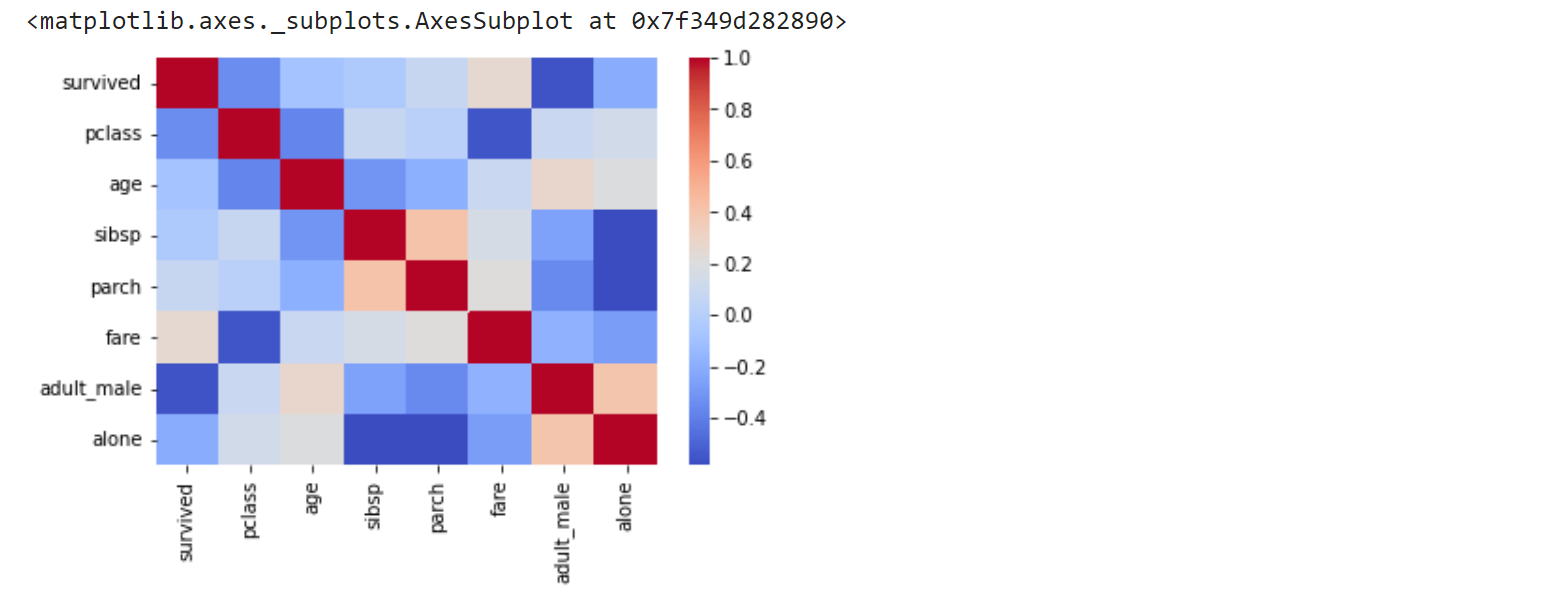

### **Gere uma visualização que mostre os sobreviventes de acordo com seu sexo e sua classe**

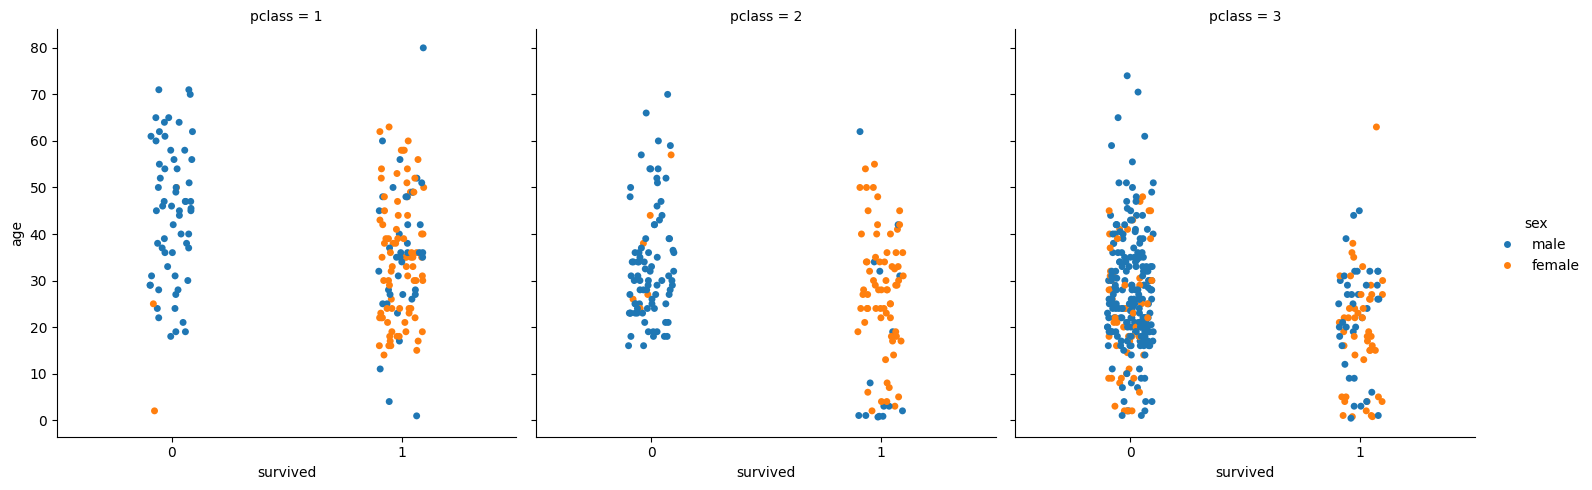

In [155]:
sns.catplot(data=dataset, x='survived', y='age', hue='sex', col='pclass')

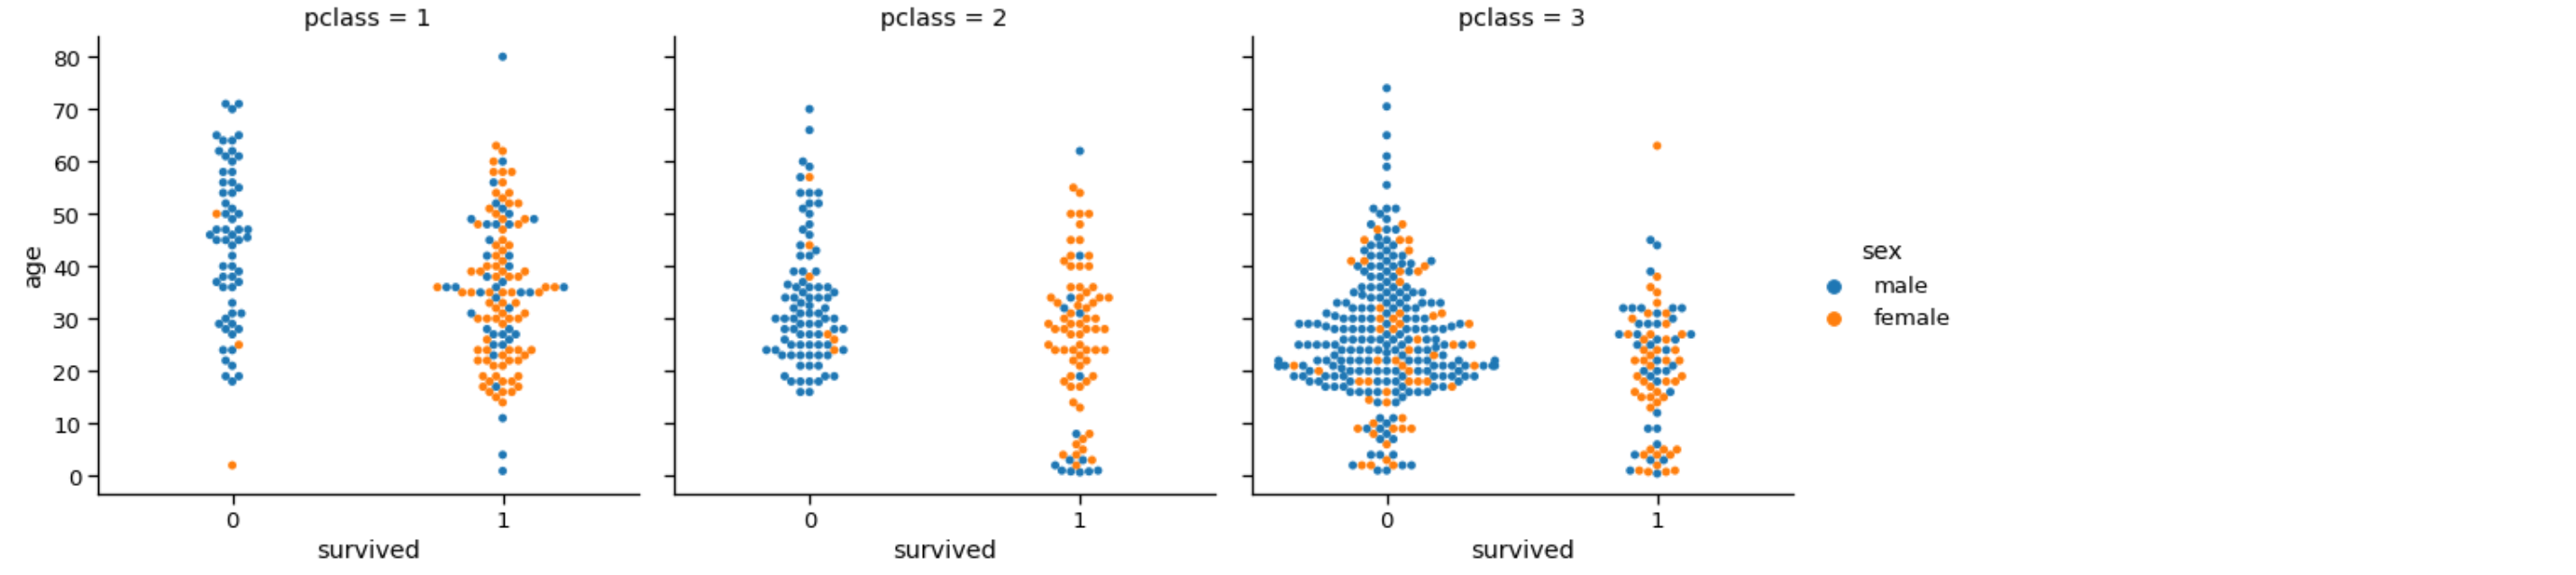